use suffled3.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv('suffled3.csv')

df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-07-28,306.637012,308.326758,304.181926,304.480103,2116300,0.0,0.0
1,2015-09-17,89.160056,91.267558,89.140805,89.698959,4627000,0.0,0.0
2,2021-07-12,374.526799,375.595456,371.610470,375.086090,2648300,0.0,0.0
3,2017-03-17,109.891268,110.524228,109.803631,109.871796,4119200,0.0,0.0
4,2007-08-22,13.291884,13.592761,13.205919,13.532025,26579000,0.0,0.0


In [3]:

df.describe()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000


In [4]:
#make date index
df.Date=pd.to_datetime(df.Date)
df.set_index('Date',inplace=True)

<AxesSubplot:>

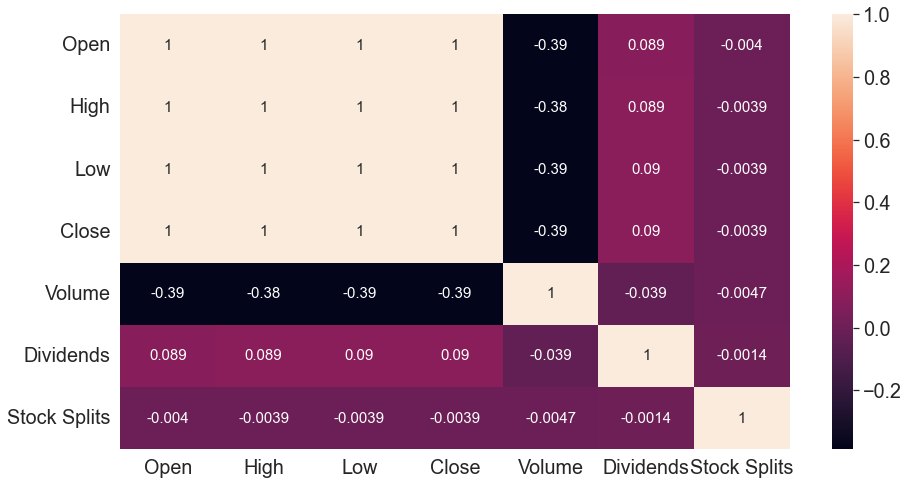

In [5]:

corr=df.corr()
plt.figure(figsize=(15, 8))
sns.set(font_scale=1.8)
sns.heatmap(corr,annot=True, annot_kws={'size':15})

In [6]:

df=df.reset_index()
df=df.sort_values('Date',ascending=False)
df.Date=df.Date.astype(str)




<AxesSubplot:xlabel='Date', ylabel='Close'>

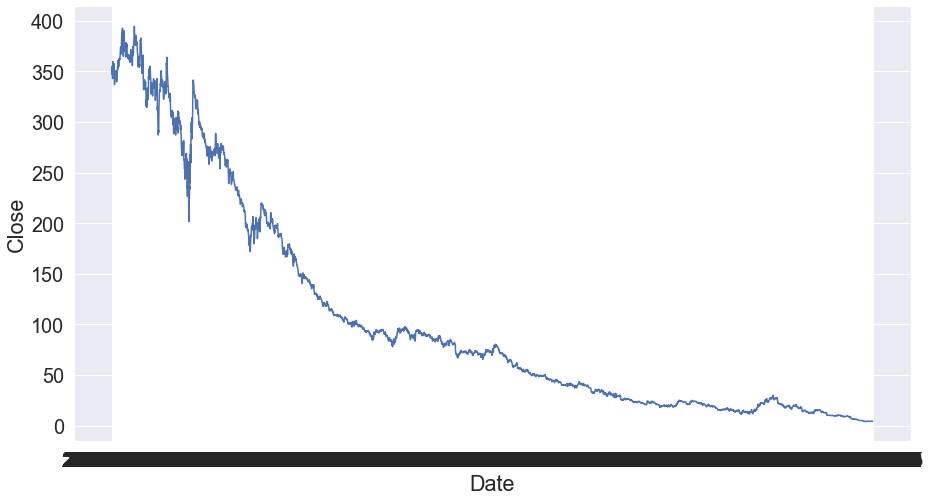

In [7]:
plt.figure(figsize=(15, 8))

sns.lineplot(data=df,x='Date',y="Close")

Linear Regression prediction with test_size=0.2 the label is close

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X= df.loc[:,['Open','High','Low','Volume','Dividends','Stock Splits']].values
Y=df.loc[:,['Open','High','Low','Volume','Dividends','Stock Splits']].values


X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=85)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [11]:
pipe=Pipeline([('scaler', StandardScaler()),('LR_model',LinearRegression())])
pipe.fit(X_train,Y_train)
pipe.score(X_test,Y_test)

0.8331180017226472

In [12]:
Y_predict=pipe.predict(X_test)


In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_predict)

0.021505376344086034

In [14]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_predict)

0.0021505386977831407

In [15]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_predict)

0.8331180017226472

In [16]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_test, Y_predict))

0.14664711502135333

In [17]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(Y_test, Y_predict)

0.021661626344087994

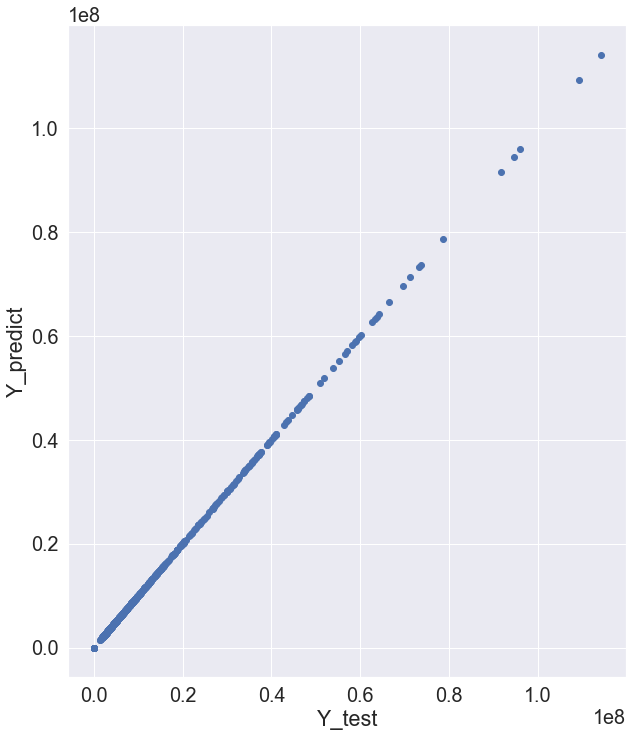

In [29]:
plt.figure(figsize=(10, 12))
plt.scatter(Y_test, Y_predict)
plt.xlabel('Y_test')
plt.ylabel('Y_predict')
plt.show()

2- write run postgress docker command
and save y predicted labeles with datatime in database

In [ ]:
docker run --name postgresql -e POSTGRES_USER=Mapsa -e POSTGRES_PASSWORD=Mapsa1234 -p 5432:5432  -d postgres 

In [ ]:
conn = psycopg2.connect(
    host="localhost",
    database="ml",
    user="Mapsa",
    password="Mapsa1234")

3- scrape  https://api.divar.ir/v8/web-search/tehran/buy-apartment?districts=992 api to find token then use https://api.divar.ir/v5/posts/{token} api and save apartment price and location property in json file

ابتدا توکن ها را گرفته

In [ ]:
import requests
import time
import json

url = "https://api.divar.ir/v8/web-search/tehran/buy-apartment?districts=992"
json1 ={"json_schema":{"category": {"value": "residential-sell"}, "cities": ["1"]},
"last-post-date": 1671953475845188}
headers = {
    "Content_Type": "application/json"}

tokens_list=[]
res =requests.post(url, json=json1,headers=headers)

data=res.json()

last_post_date=data['last_post_date']


count=0
while True:
    
    url = "https://api.divar.ir/v8/web-search/1/residential-sell"
    json2 ={"json_schema":{"category": {"value": "residential-sell"}, "cities": ["1"]},
    "last-post-date": last_post_date}
    headers = {
        "Content_Type": "application/json"}
    
    res=requests.post(url,json=json2, headers=headers)
    
    try:
        data= res.json()
        
        last_post_date=last_post_date-800000
        
     
        
        
        
        last_post_date=data['last_post_date']
    

    
        for item in data['web_widgets']['post_list']:
            token=item['data']['token']
            tokens_list.append(token)
        
        
            count+=1
        
        if count>=10:
            break
    except:
        print (last_post_date,count)
        txt_file=open ('token.txt','w',encoding='utf8')
        txt_file.write(','.join(tokens_list))
        txt_file.close()
        break

   
    else:

        txt_file=open ('token.txt','w',encoding='utf8')
        txt_file.write(','.join(tokens_list))
        txt_file.close()

سپس اطلاعات را گرفته

In [ ]:

import requests
import json
import pandas as pd

my_tokens=open('token1.txt','r')
my_tokens=my_tokens.read().split(',')

dataset=[]
urls=list(map (lambda x:'https://api.divar.ir/v5/posts/%7Btoken%7D%s' %(x),my_tokens))





for url in urls:
    try:
        res=requests.get(url)

        data=res.json()
    except:
        continue
    try:
        district=data['sections'][1]['widgets'][0]['data']['subtitle'].split('،')[1].split('|')[0]
      
        value=data['sections'][8]['widgets'][1]['data']['value'].split()[0]
       
    except:
        continue
   
    
    house={
        'district':district,
        'value':value,
        
        
        }
    
    dataset.append(house)
filename='house.json'
with open(filename, 'w') as file_object:  
    json.dump(dataset, file_object)

Supervised vs unsupervised

what is Semisupevised

what is the effect of Learning rate low and up

nstance base vs model based

Data is more important or algorithm 

what is the meaning of Overfit and underfit and what can we do if they happen?

روش های گرادیان دیسنت چیست؟


supervised:
دارای لیبل هستند
supervised learning uses labeled input and output data, while an unsupervised learning algorithm does not

Semi-supervised machine learning is a combination of supervised and unsupervised learning. It uses a small amount of labeled data and a large amount of unlabeled data, which provides the benefits of both unsupervised and supervised learning while avoiding the challenges of finding a large amount of labeled data.

The main difference in these models is how they generalize information. Instance-based learning will memorize all the data in a training set and then set a new data point to the same or average output value of the most common data point or similar data points it has memorized. 
In model-based learning, the model would create a prediction line or prediction sections based on the different attributes of the data it trained on. A new data point would then fall along this line or within certain sections based on the attributes it possesses.

data in definitely more important than algorithms. when you have insufficient, the none of algorithms can help you 

Overfit:
when the model cannot generalize and fits too closely to the training dataset instead
- you should :Early stopping
Early stopping pauses the training phase before the machine learning model learns the noise in the data
eliminates irrelevant features

underfit:
the model cannot determine a meaningful relationship between the input and output data

you should:
Decrease regularization
Increase the duration of training
Feature selection

Batch gradient descent
Stochastic gradient descent
Mini-batch gradient descent